# Linear Regression - Project Exercise

Trying to help an e-commerce styling company to identify if they should focus on their mobile app or website following the datas they have at disposal : "<u>ecommerce_customers.csv</u>"

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
sns.set_style("whitegrid")

### Get the Data

In [3]:
df = pd.read_csv('ecommerce_customers.csv')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.4+ KB


### Exploratory Data Analysis

#### With jointplot, comparing Time on Website and Yearly amount Spent. 

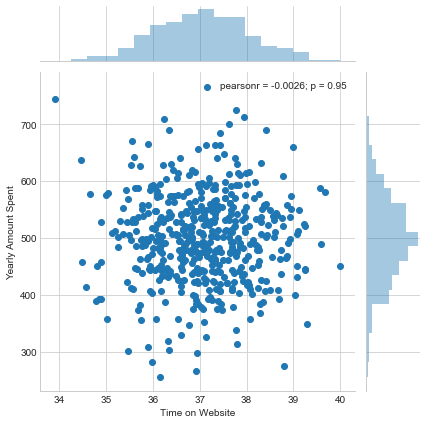

In [10]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')

#### Same for 'Time on App' Column

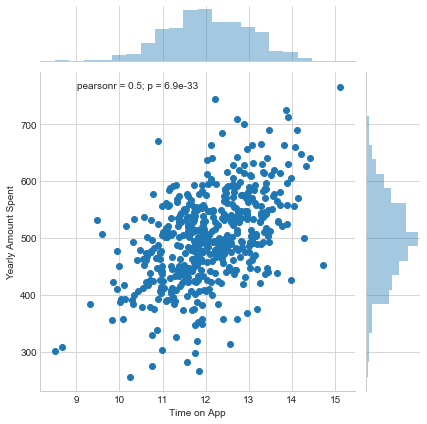

In [13]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent')

#### For a wider view, let's compare over the overall spectrum of the dataset

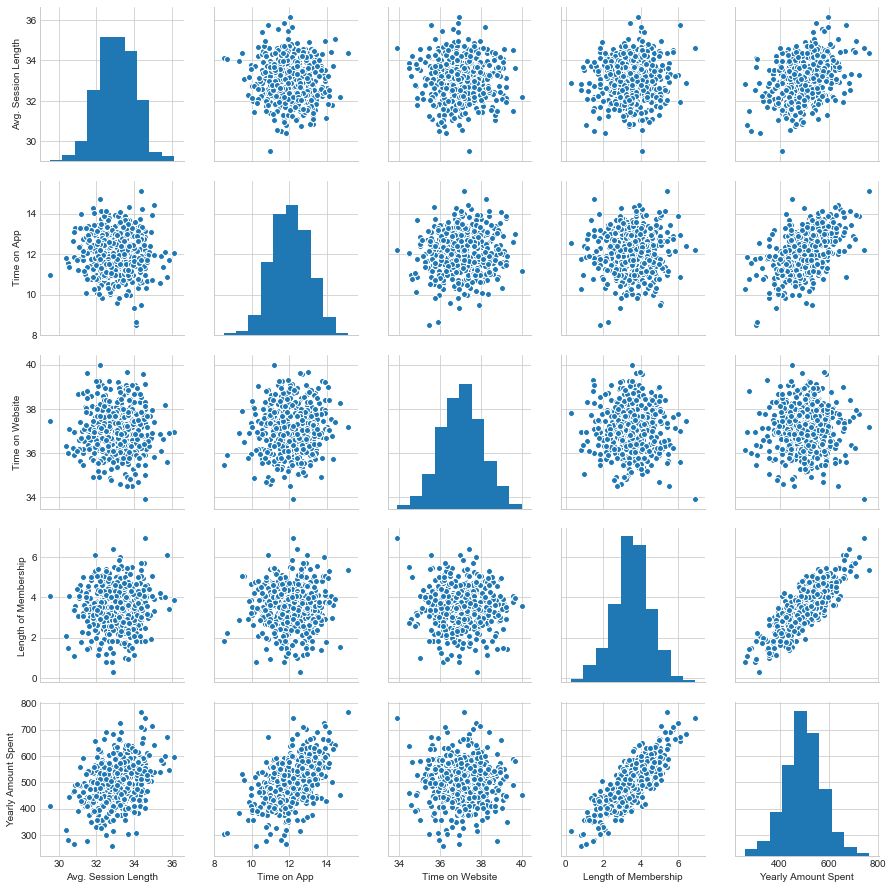

In [14]:
sns.pairplot(df)

** We can notice that the most correlated set of data is the pair (Length of Membership, Yearly Amount Spent) **

### Creating a linear model plot of 'Yearly Amount Spent' vs. 'Length of Membership'

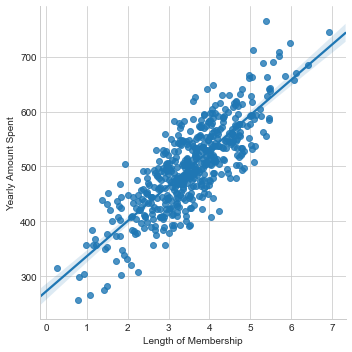

In [15]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

### Training and Testing Data

Let's split the data into **Training** and **Testing** sets

In [16]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [20]:
X.head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
5,33.871038,12.026925,34.476878,5.493507
6,32.021596,11.366348,36.683776,4.685017
7,32.739143,12.351959,37.373359,4.434273
8,33.987773,13.386235,37.534497,3.273434
9,31.936549,11.814128,37.145168,3.202806


In [19]:
y = df['Yearly Amount Spent']

In [21]:
y.head(10)

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
5    637.102448
6    521.572175
7    549.904146
8    570.200409
9    427.199385
Name: Yearly Amount Spent, dtype: float64

#### Using Sklearn to split the data into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

### Training the model

In [24]:
from sklearn.linear_model import LinearRegression

#### Creatin an instance of a LinearRegression() model 

In [25]:
lm = LinearRegression()

#### Train / fit lm on the training data

In [26]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### printing the coefficents of the model

In [27]:
print("Coefficients : {}".format(lm.coef_))

Coefficients : [ 25.98154972  38.59015875   0.19040528  61.27909654]


### Predciting Test Data

evaluating the performance by predicting the test values 

#### Using lm.predict() to predict off the X_test set of the data

In [29]:
pred = lm.predict(X_test)

#### Create a scatterplot of the real test values versus the predicted values

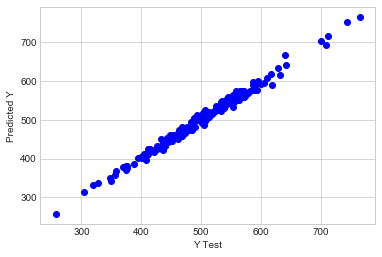

In [32]:
plt.scatter(x=y_test, y=pred, color='blue')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

### Evaluating the Model

Evaluating the model performance by calculating the **residual sum of squares** and the **explained variance score**

Caluclating the ** MAE, MSE, RMSE**

In [33]:
from sklearn import metrics

print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, pred)))
print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, pred)))
print("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, pred))))

Mean Absolute Error: 7.2281486534308295
Mean Squared Error: 79.81305165097434
Root Mean Squared Error: 8.933815066978628


### Residuals

check if the residuals distribution is normally distributed 

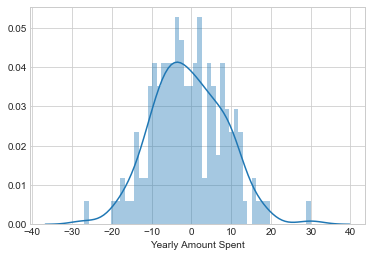

In [34]:
sns.distplot(y_test - pred,bins=50)